# Monte Carlo Valuation

We want to value a European call option by Monte Carlo simulation. To this end, we simulate the evolution of a stock index level which we assume to follow a geometric Brownian motion

$$dS_t = r S_t dt + \sigma S_t dZ_t$$

with $S$ the stock price, $r$ the risk-free rate, $\sigma$ the volatility and $Z$ a Brownian motion.

An exact discretization scheme is given for $t>0$ by

$$S_t = S_{t - \Delta t} \exp \left((r - \frac{1}{2} \sigma^2) \Delta t + \sigma \sqrt{\Delta t} z_t \right)$$

with $z$ being a standard normally distributed random variable.

## Simulation with Pure Python
First, we import needed functions and define some global variables.

The **Monte Carlo estimator** for the European call options value with strike $K = 105$ is given by

$C_0 \approx e^{-rT} \frac{1}{I} \sum_I \max[S_T(i)-K, 0]$

In Python this might take on the form:

In [1]:
S0 = 100; r = 0.05; sigma = 0.2
T = 1.0; M = 100; dt = T / M

In [3]:
import math
from random import gauss

# Simulating I paths with M time steps
def genS_py(I):
    ''' I : number of index level paths '''
    S = []
    for i in range(I):
        path = []
        for t in range(M + 1):
            if t == 0:
                path.append(S0)
            else:
                z = gauss(0.0, 1.0)
                St = path[t - 1] * math.exp((r - 0.5 * sigma ** 2) * dt
                                      + sigma * math.sqrt(dt) * z)
                path.append(St)
        S.append(path)
    return S

In [6]:
I = 100000
%time S = genS_py(I)

CPU times: user 9.9 s, sys: 184 ms, total: 10.1 s
Wall time: 10.2 s


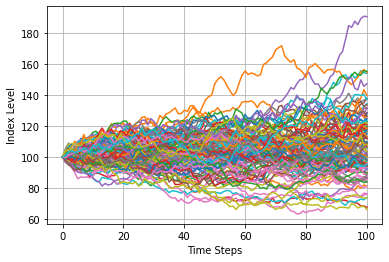

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(100):
    plt.plot(S[i])
plt.xlabel('Time Steps')
plt.ylabel('Index Level')
plt.grid(True)

In [11]:
K = 105.
sum_val = 0.0
for path in S:
    sum_val += max(path[-1] - K, 0)
C0 = math.exp(-r * T) * sum_val / I
round(C0, 3)

8.034

In [16]:
# List comprehension
C0 = math.exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I
round(C0, 3)

SyntaxError: invalid syntax (<ipython-input-16-905987a54324>, line 5)

## Simulation with NumPy

We use the log version of the discretization scheme

$$\log S_t = \log S_{t - \Delta t} + (r - 0.5 \sigma^2 ) \Delta t + \sigma \sqrt{\Delta t} z_t $$

to fully apply NumPy's vectorization capabilities:

In [17]:
import numpy as np
def genS_np(I):
    ''' I : number of index level paths '''
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                + sigma * np.sqrt(dt)
                * np.random.standard_normal((M + 1, I)), axis=0))
    S[0] = S0
    return S

In [19]:
%time S = genS_np(I)

CPU times: user 425 ms, sys: 33.1 ms, total: 458 ms
Wall time: 459 ms


In [23]:
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I
round(C0, 3)

8.167